# Exercise 10

Simulation of finite temperature 4d SU(2) pure gauge theory using heatbath and over-relaxation updates, measurement of Wilson loop and polyakov loop.

A c++ code to simulate this theory is available in the folder 'code', and the data from which these plots are made are in 'code/results'

In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

In [8]:
# Some functions for calculating expectation values and uncertainties of observables:

# For a simple average of a set of uncorrelated values...
def av(dat):
    return np.average(dat)

# ...the uncertainty is just the standard error on the mean:
def err(dat):
    return np.sqrt(np.var(dat)/dat.size)

# We can also use resampling methods to estimate this uncertainty:

# Jacknife takes a set of N data points,
# generates N resampled sets of (N-1) data points by 
# copying the original set but removing one value,
# measures the observable for each of these sets
# and returns the variance of the average of this observable.
def err_jacknife(dat, observable):
    resampled_obs = []
    for i_remove in range(dat.size):
        # make resampled set of data by removing i-th data point
        resampled_dat = np.delete(dat, i_remove)
        # measure observable on this set of data
        sample_obs = observable(resampled_dat)
        # add to set of measurements
        resampled_obs.append(sample_obs)
    # return variance of the set of measurements
    return np.sqrt((dat.size-1.0)*np.var(resampled_obs))

# Bootstrap takes a set of N data points,
# and randomly chooses N data points from this set to make
# a resampled data set (where it is allowed to choose 
# the same original data point more than once).
# Then the observable is measured on this new data set,
# and the process is repeated n_boot times to generate
# a set of estimates for the observable, and the
# bootstrap error is the variance of the mean of these estimates.
# n_boot should be taken as large as feasible.
# Jacknife can be seen as a linear approximation to bootstrap.
def err_bootstrap(dat, observable, n_boot=50000):
    resampled_obs = []
    for i_boot in range(n_boot):
        # make resampled set of data by choosing N points with replacement
        resampled_dat = np.random.choice(dat, size=dat.size, replace=True)
        # measure observable on this set of data
        sample_obs = observable(resampled_dat)
        # add to set of measurements
        resampled_obs.append(sample_obs)
    # return variance of the set of measurements
    return np.sqrt(np.var(resampled_obs))

# Consistency checks: the error on the mean should approximately agree
# between the three methods of calculating it.
# (expect exact agreement in the limit of an infinitely large set of data and n_boot -> infinity)
N = 10000
sigma = 0.8
mu = 0.0
dat = np.random.normal(mu, sigma, N)
print("Gaussian distribution of 10^4 random numbers with mu=0, sigma=0.8:\n")
print("Expected mean: ", mu)
print("Measured mean: ", av(dat))
print("\nError on mean [expected analytic]: ", sigma/np.sqrt(N))
print("Error on mean [standard]: ", err(dat))
print("Error on mean [jacknife]: ", err_jacknife(dat, av))
print("Error on mean [bootstrap]: ", err_bootstrap(dat, av))

# The advantage of the resampling methods is that they are valid for any observable, not just the average.
# For example the susceptibility:
def sus(dat):
    return np.average(dat*dat) - np.power(np.average(dat), 2)

print("\nExpected susceptibility: ", np.power(sigma, 2))
print("Measured susceptibility: ", sus(dat))
print("\nError on susceptibility [expected analytic]: ", np.sqrt(2*np.power(sigma, 4)/N))
print("Error on the susceptibility [jacknife]: ", err_jacknife(dat, sus))
print("Error on the susceptibility [bootstrap]: ", err_bootstrap(dat, sus))

Gaussian distribution of 10^4 random numbers with mu=0, sigma=0.8:

Expected mean:  0.0
Measured mean:  -0.0047510864605

Error on mean [expected analytic]:  0.008
Error on mean [standard]:  0.00800763229831
Error on mean [jacknife]:  0.00800803270996
Error on mean [bootstrap]:  0.00799173110774

Expected susceptibility:  0.64
Measured susceptibility:  0.64122175025

Error on susceptibility [expected analytic]:  0.00905096679919
Error on the susceptibility [jacknife]:  0.00918026006524
Error on the susceptibility [bootstrap]:  0.00916294854507


In [3]:
# Read raw data, construct observables and errors
T = 4
Lvals = [4, 8, 12]
plaq = {}
poly = {}
for L in Lvals:
    vol = T * np.power(L,3)
    plaq[L] = []
    poly[L] = []
    for beta in [1.00, 2.00, 2.20, 2.26, 2.28, 2.30, 2.32, 2.34, 2.40, 2.60, 3.00, 4.00]:
        dat = np.loadtxt("code/results/T%d_L%d_beta%.2f.txt" % (T, L, beta))
        plq = vol*dat[:,1]
        pol = vol*np.fabs(dat[:,0])
        plaq[L].append([beta, av(plq)/vol, err(plq)/vol, sus(plq)/vol, err_jacknife(plq, sus)/vol])
        poly[L].append([beta, av(pol)/vol, err(pol)/vol, sus(pol)/vol, err_jacknife(pol, sus)/vol])
    plaq[L] = np.array(plaq[L])
    poly[L] = np.array(poly[L])

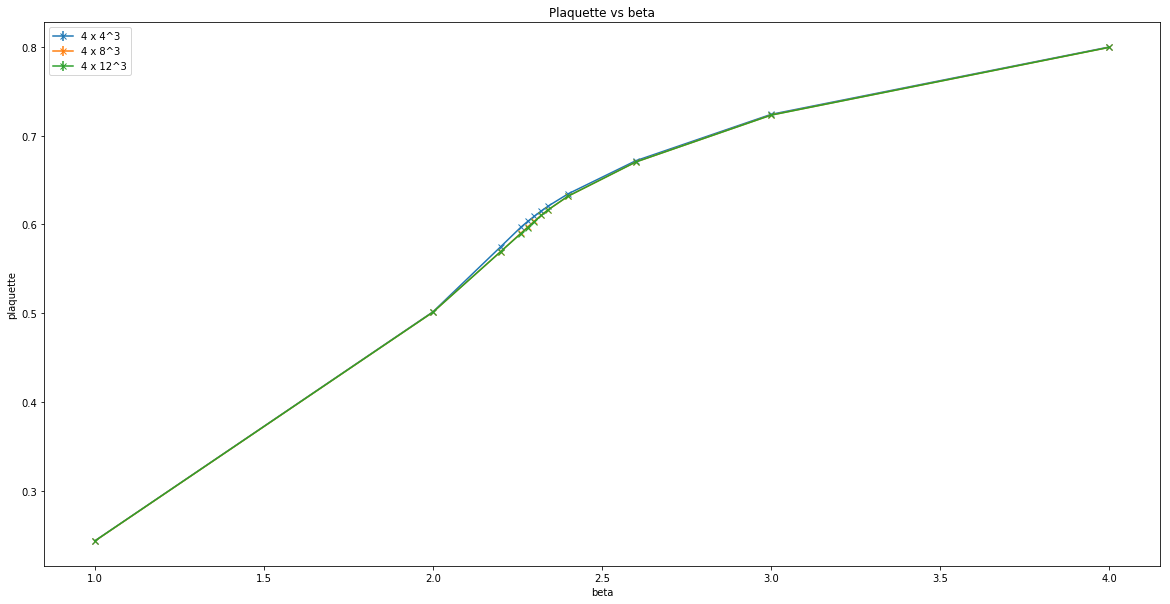

In [4]:
plt.figure()
for L in Lvals:
    plt.errorbar(plaq[L][:,0], plaq[L][:,1], yerr=plaq[L][:,2], marker="x", label=str(T)+" x "+str(L)+"^3")
plt.ylabel('plaquette')
plt.xlabel('beta')
plt.legend()
plt.title('Plaquette vs beta')
plt.show()

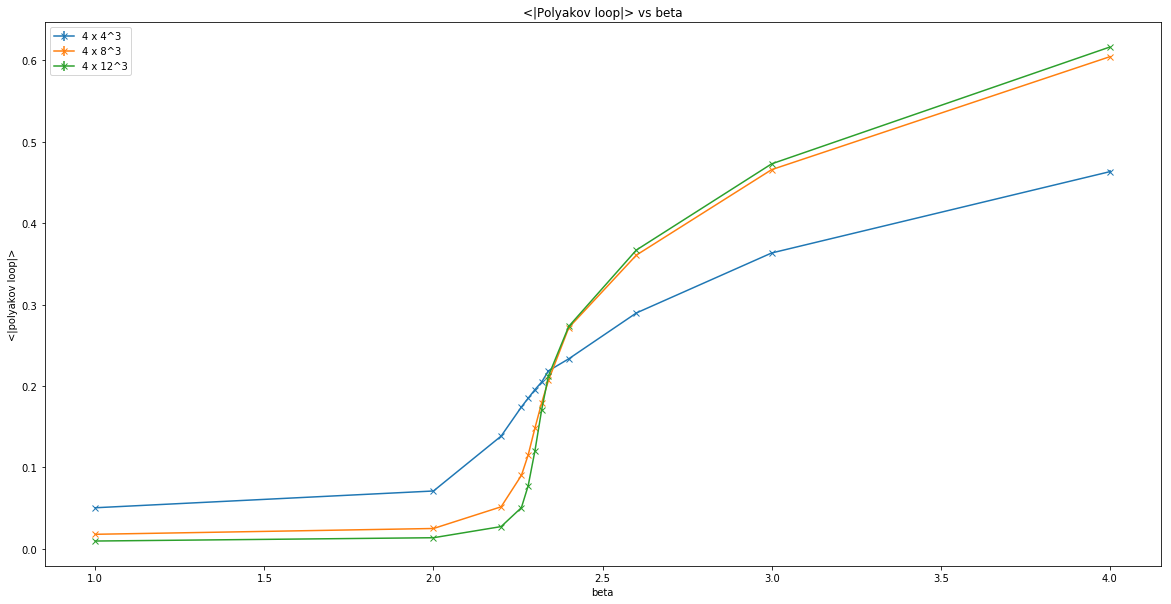

In [5]:
plt.figure()
for L in Lvals:
    plt.errorbar(poly[L][:,0], poly[L][:,1], yerr=poly[L][:,2], marker="x", label=str(T)+" x "+str(L)+"^3")
plt.ylabel('<|polyakov loop|>')
plt.xlabel('beta')
plt.legend()
plt.title('<|Polyakov loop|> vs beta')
plt.show()

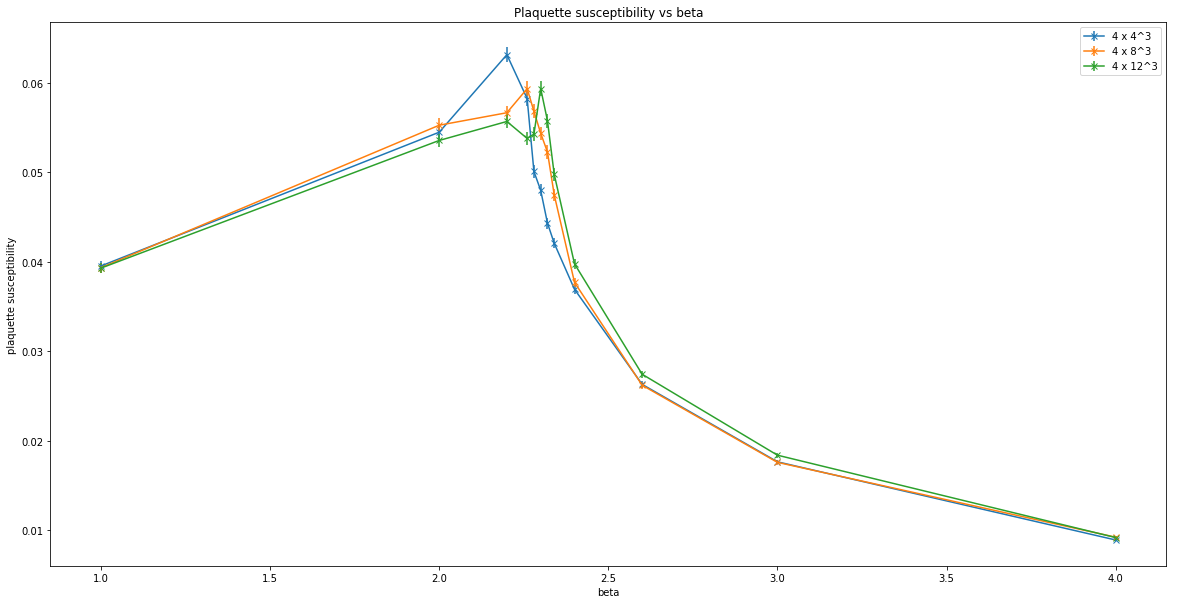

In [6]:
plt.figure()
for L in Lvals:
    plt.errorbar(plaq[L][:,0], plaq[L][:,3], yerr=plaq[L][:,4], marker="x", label=str(T)+" x "+str(L)+"^3")
plt.ylabel('plaquette susceptibility')
plt.xlabel('beta')
plt.legend()
plt.title('Plaquette susceptibility vs beta')
plt.show()

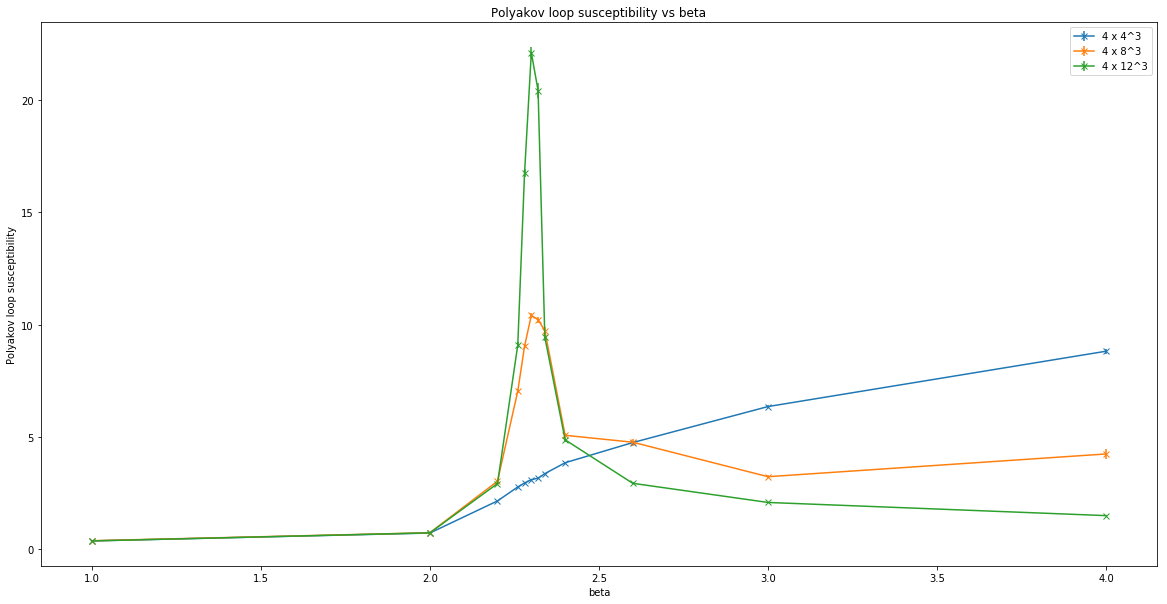

In [7]:
plt.figure()
for L in Lvals:
    plt.errorbar(poly[L][:,0], poly[L][:,3], yerr=poly[L][:,4], marker="x", label=str(T)+" x "+str(L)+"^3")
plt.ylabel('Polyakov loop susceptibility')
plt.xlabel('beta')
plt.legend()
plt.title('Polyakov loop susceptibility vs beta')
plt.show()